# Lesson 7 - Parkinson PCR

## Author - Studetname

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [102]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [103]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [104]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [105]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

#### Basic statistics


In [106]:
parkinsons_df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


#### Visualizing each column 

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


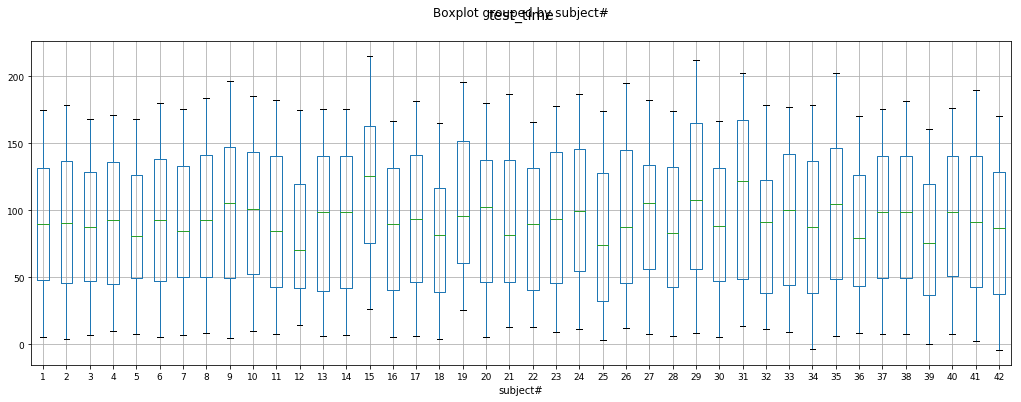

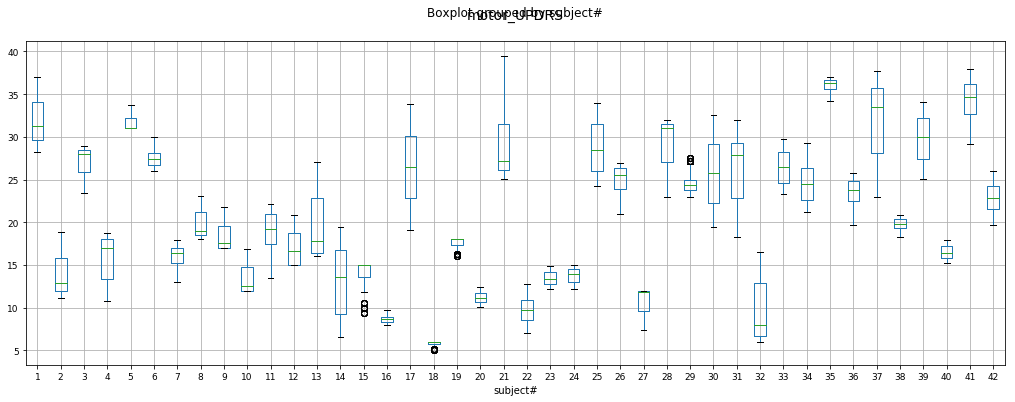

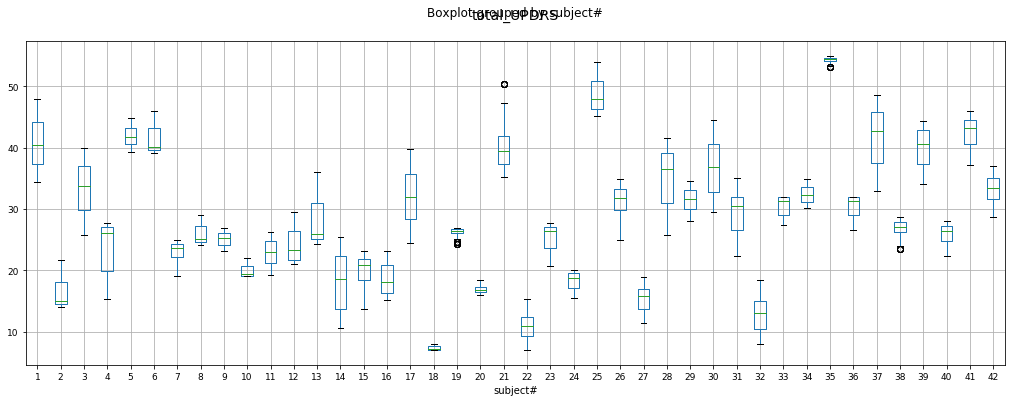

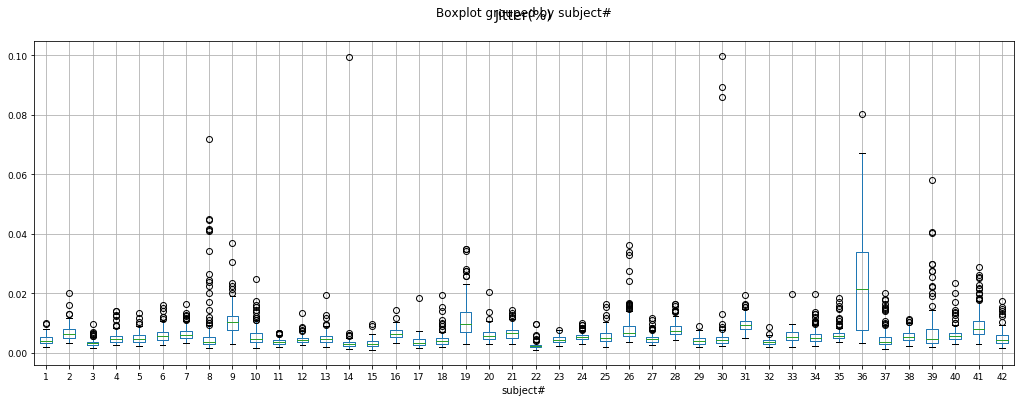

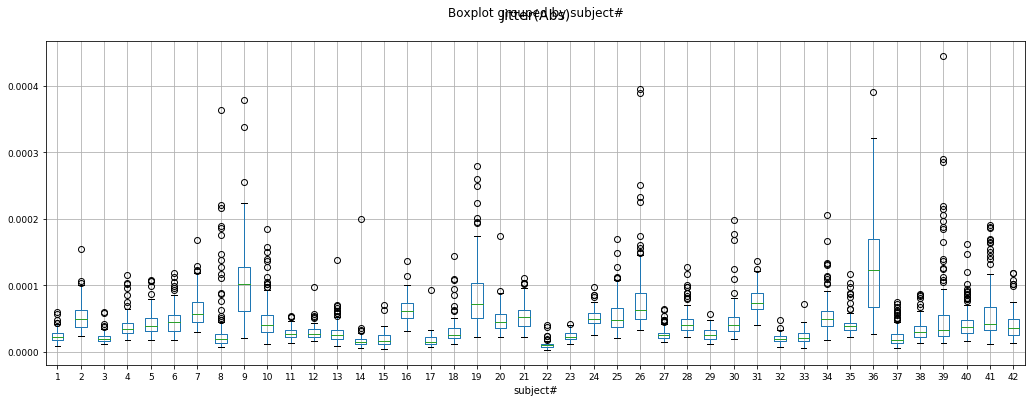

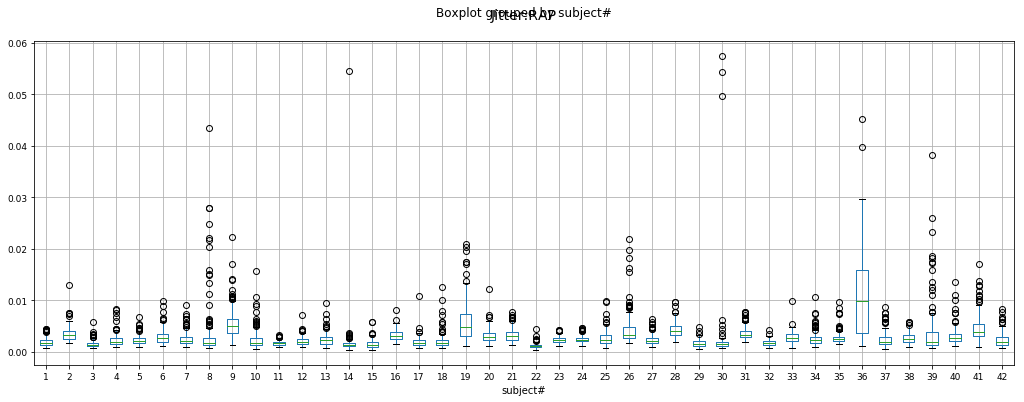

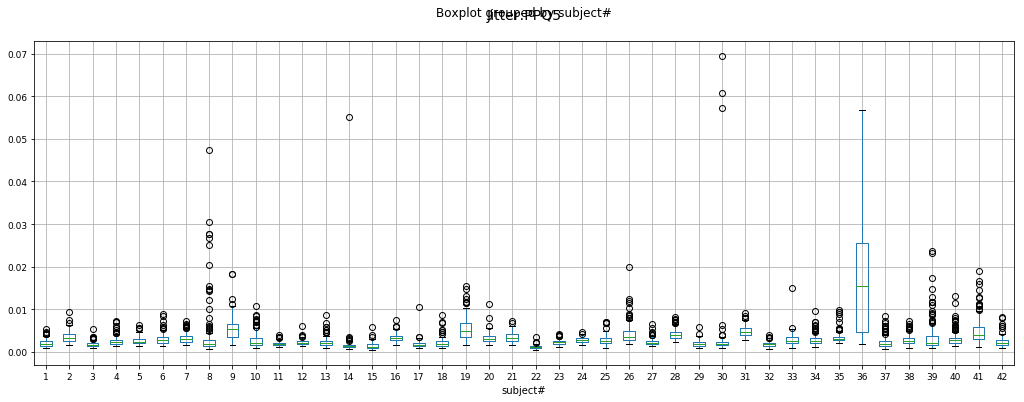

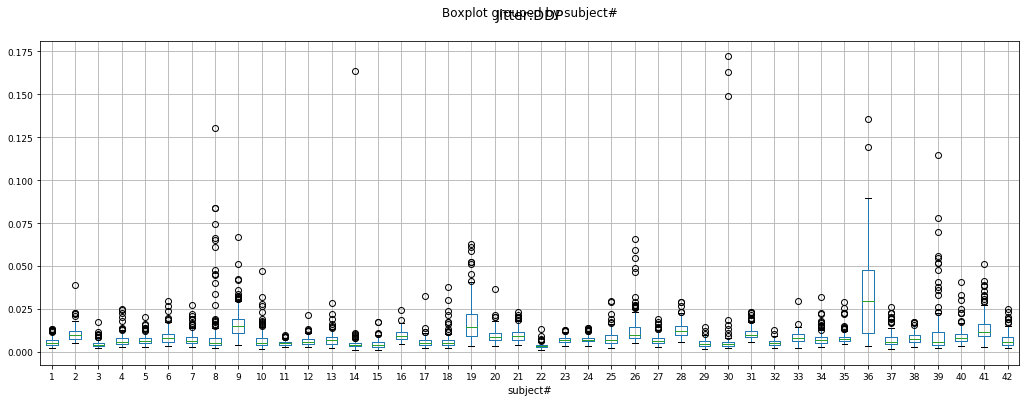

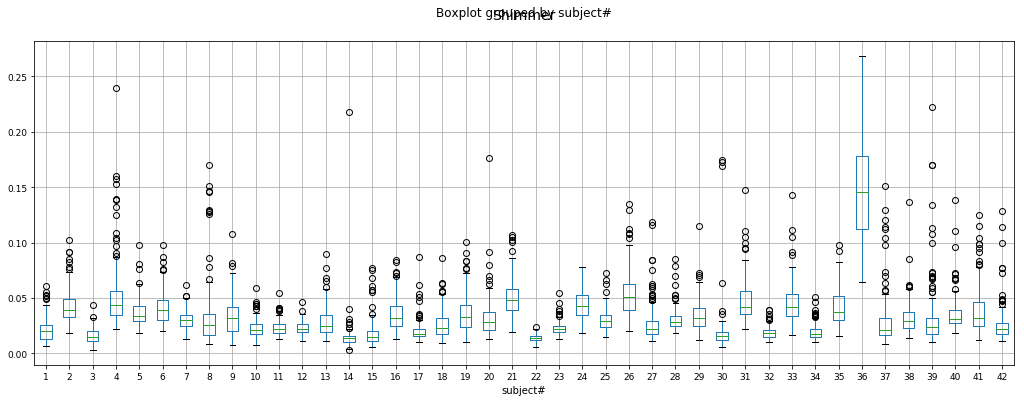

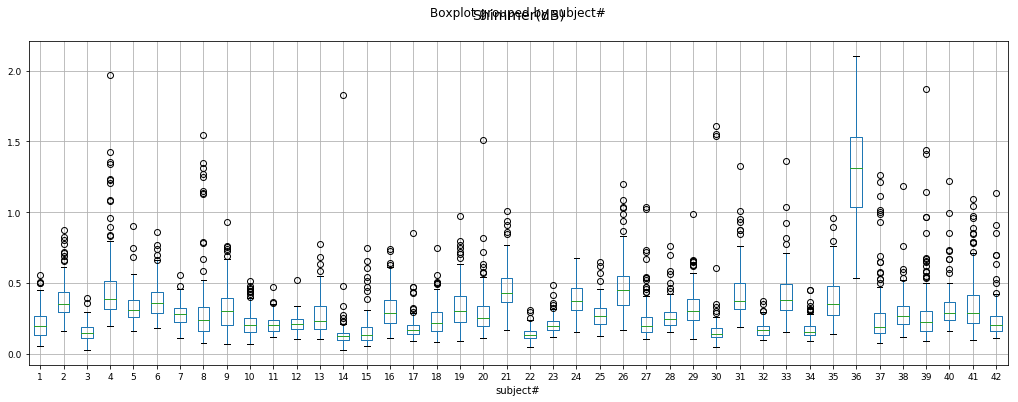

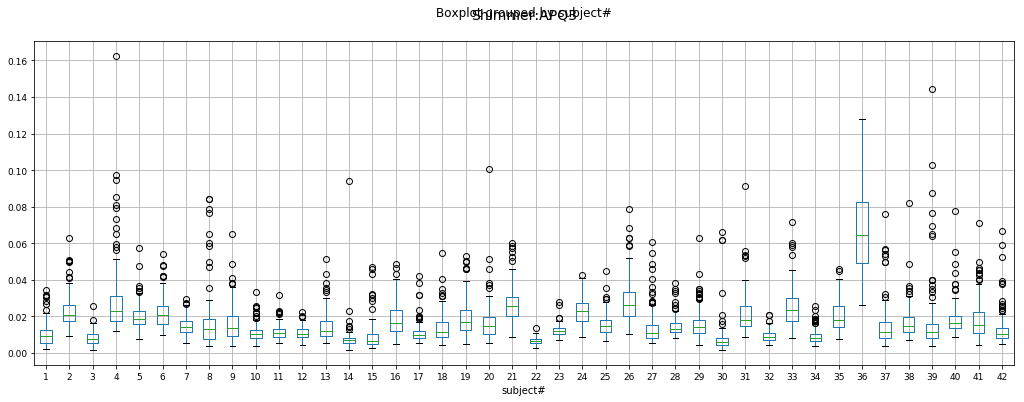

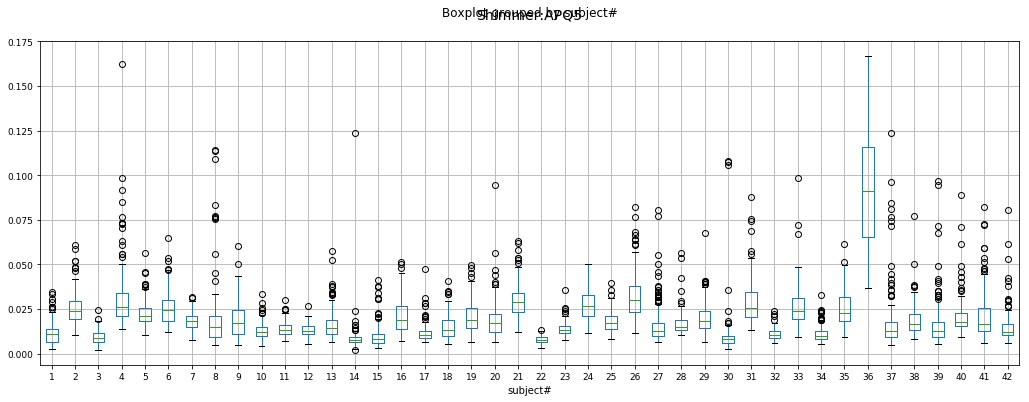

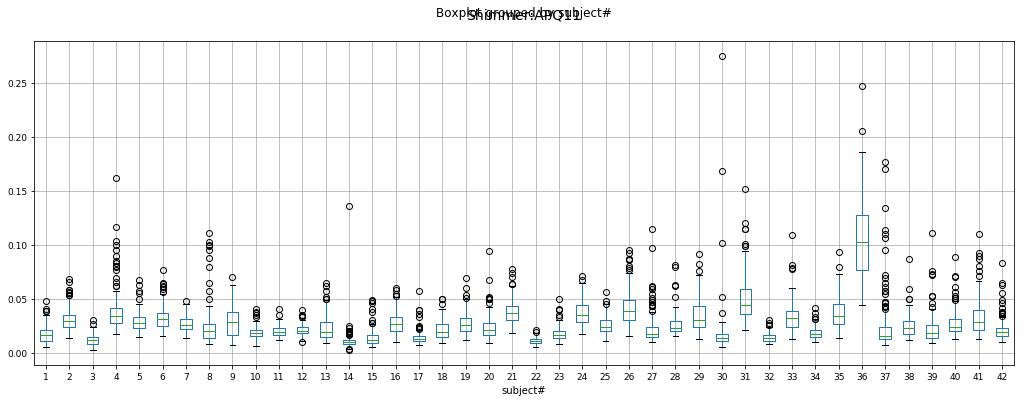

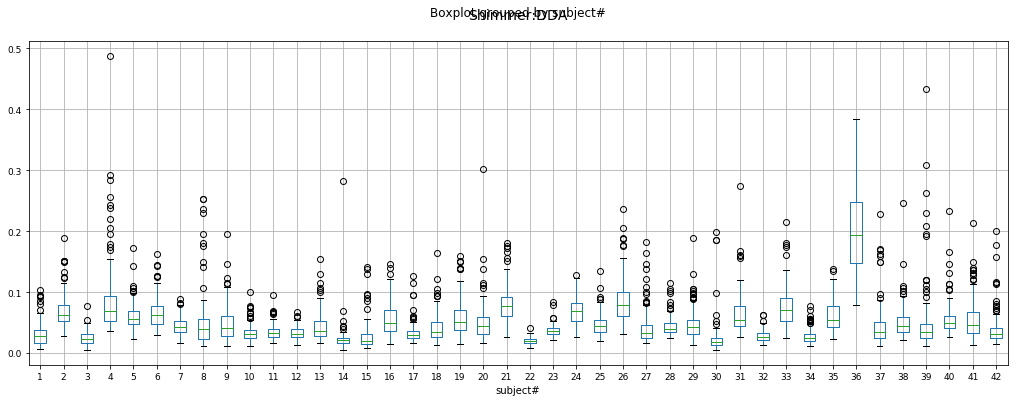

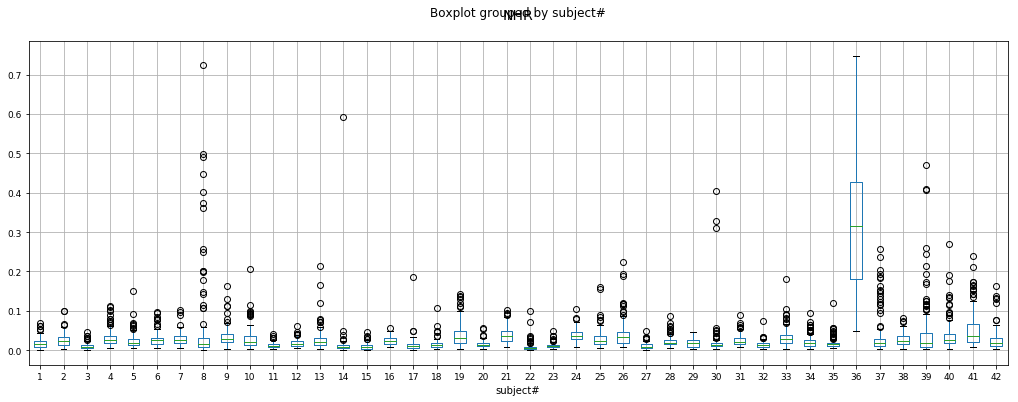

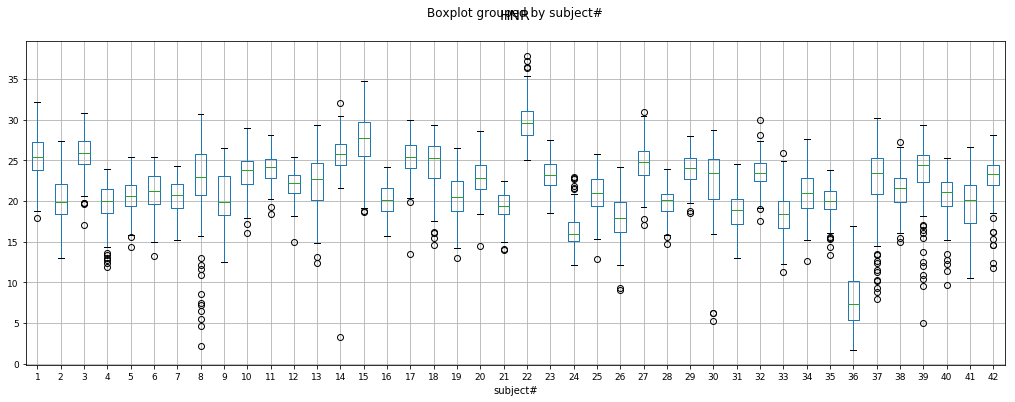

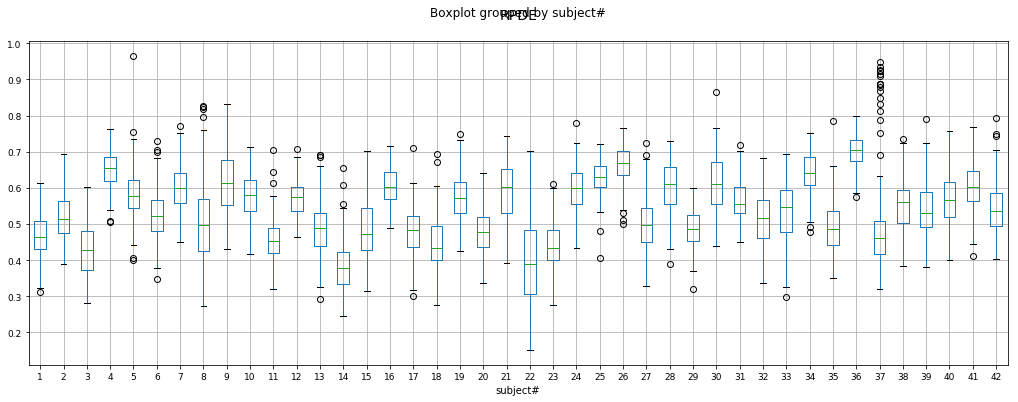

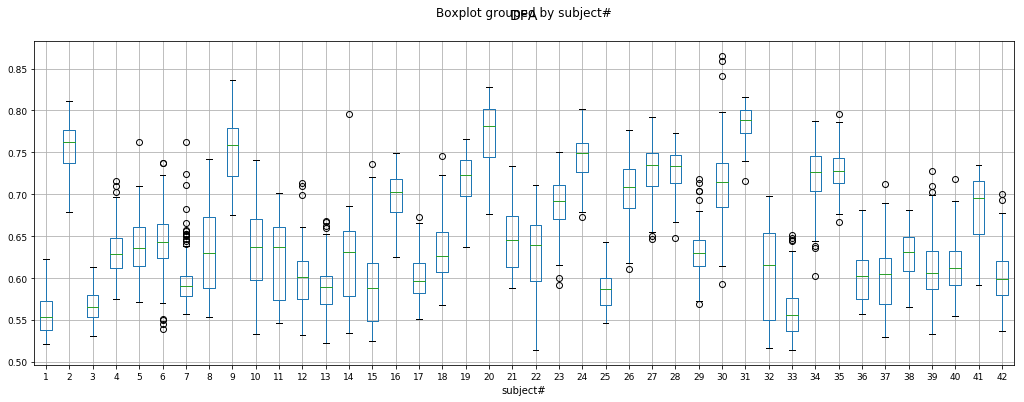

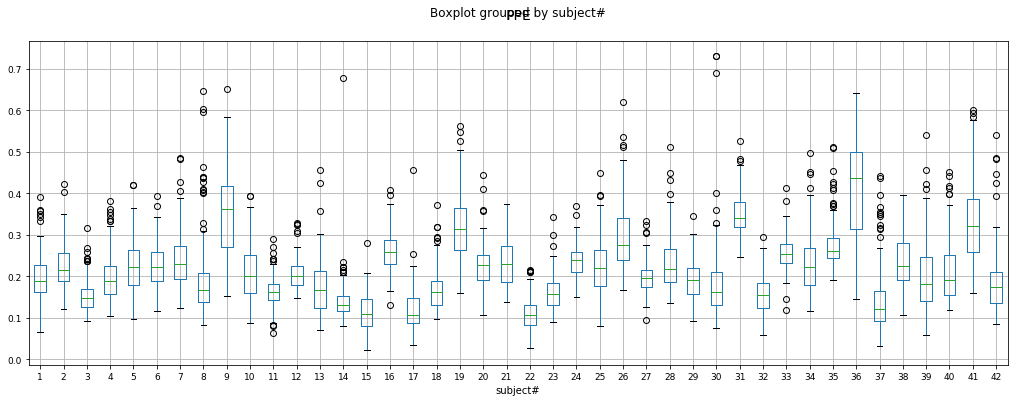

In [107]:
for c in parkinsons_df.columns[3:]:
    parkinsons_df.boxplot(c,by='subject#',figsize=(17,6),fontsize=9)
    plt.title("{}\n".format(c),fontsize=14)
    plt.show()

#### Are the features independent? Plot co-variance matrix

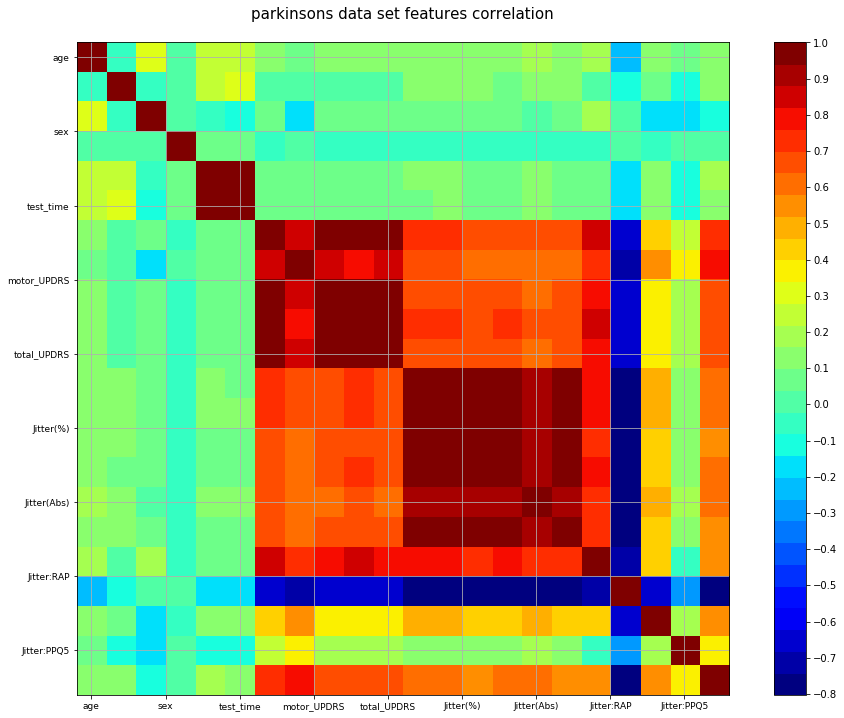

In [108]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow( parkinsons_df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('parkinsons data set features correlation\n',fontsize=15)
    labels= parkinsons_df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix( parkinsons_df)

In [109]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix
y = parkinsons_df[target_label]
X = parkinsons_df.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (5875, 17)


#### PCA requires scaling/normalization of the data to work properly

In [51]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [53]:
# Scale all columns first

parkinsons_df["Jitter(%)"] = scale(parkinsons_df['Jitter(%)'])
parkinsons_df['Jitter(Abs)'] = scale(parkinsons_df['Jitter(Abs)'])
parkinsons_df['Jitter:RAP'] = scale(parkinsons_df['Jitter:RAP'])
parkinsons_df['Jitter:PPQ5'] = scale(parkinsons_df['Jitter:PPQ5'])
parkinsons_df['Jitter:DDP'] = scale(parkinsons_df['Jitter:DDP'])
parkinsons_df['Shimmer'] = scale(parkinsons_df['Shimmer'])
parkinsons_df['Shimmer(dB)'] = scale(parkinsons_df['Shimmer(dB)'])
parkinsons_df['Shimmer:APQ3'] = scale(parkinsons_df['Shimmer:APQ3'])
parkinsons_df['Shimmer:APQ5'] = scale(parkinsons_df['Shimmer:APQ5'])
parkinsons_df['Shimmer:APQ11'] = scale(parkinsons_df['Shimmer:APQ11'])
parkinsons_df['Shimmer:DDA'] = scale(parkinsons_df['Shimmer:DDA'])
parkinsons_df['NHR'] = scale(parkinsons_df['NHR'])
parkinsons_df['HNR'] = scale(parkinsons_df['HNR'])
parkinsons_df['RPDE'] = scale(parkinsons_df['RPDE'])
parkinsons_df['DFA'] = scale(parkinsons_df['DFA'])
parkinsons_df['PPE'] = scale(parkinsons_df['PPE'])

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function to each column)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#parkinsons.data = scaler.fit_transform(X)

# Create a scaled y-target
parkinsons_df[target_label] = scale(parkinsons_df[target_label])


In [54]:
x_scaled = parkinsons_df.as_matrix(columns = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5','Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'])
y_scaled = parkinsons_df[target_label]

In [55]:
# PCR!!
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca =  PCA(n_components=None)
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [56]:
print(pca_df.head())
print(pca_df.shape)

        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.978108 -0.057540  1.760088 -0.049483 -0.476558  0.376887 -0.561067   
1 -2.601857  0.553154  1.487455  0.058596  0.066572  0.170468  0.215560   
2 -1.939773 -0.115513  1.205962 -0.687477 -0.856751 -0.136187 -0.139529   
3 -1.022993 -0.103017  0.533406 -0.508542 -1.541859 -0.189726  0.583599   
4 -2.475704  0.230181  0.960314 -0.476941 -0.604783 -0.080478  0.417343   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.635614  0.339977  0.039112 -0.027261 -0.024319  0.001029  0.031725   
1 -0.165989  0.122985 -0.018919 -0.003925  0.052872 -0.011968  0.024268   
2  0.228277  0.088253  0.041748 -0.079120 -0.015546 -0.059301 -0.002890   
3 -0.088389 -0.618057  0.102112 -0.265533 -0.024285  0.001197 -0.182390   
4 -0.175978  0.016228  0.004227 -0.036416  0.009636 -0.068263  0.004084   

       pc15      pc16  total_UPDRS  
0  0.000752  0.000007     0.502745  
1 -0.000761 -0.000007   

In [57]:
print(pca.explained_variance_)


[  1.12629682e+01   1.67318476e+00   1.24072101e+00   7.64997339e-01
   3.09303033e-01   2.22920126e-01   1.72792228e-01   1.61771857e-01
   1.03092483e-01   4.35311730e-02   2.02908815e-02   1.40172168e-02
   8.66818249e-03   4.46498205e-03   3.77897603e-07   2.08498997e-08]


For the "explained variance" we interpret those values as the variance of the dataset when all the data is projected onto that $f()$ function axis.  So here, the first $f()$ function (or principal component) explains 1.12 units of the variance. The second component explains the 1.67 units of variance.The third component explains the remaining 1.24 units of variance.All other values are in negative. we can ignore them.

In [58]:
var= pca.explained_variance_ratio_
print(var)

[  7.03815693e-01   1.04556248e-01   7.75318638e-02   4.78041954e-02
   1.93281491e-02   1.39301364e-02   1.07976761e-02   1.01090201e-02
   6.44218349e-03   2.72023522e-03   1.26796424e-03   8.75926928e-04
   5.41669191e-04   2.79013879e-04   2.36145800e-08   1.30289692e-09]


In [59]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

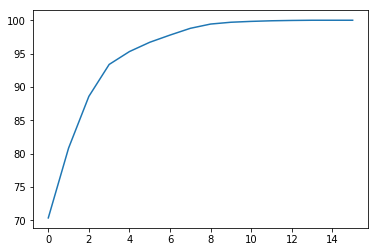

In [60]:
plt.plot(var1)
plt.show()

#### Amother way to plot the graph, which will give clear idea:

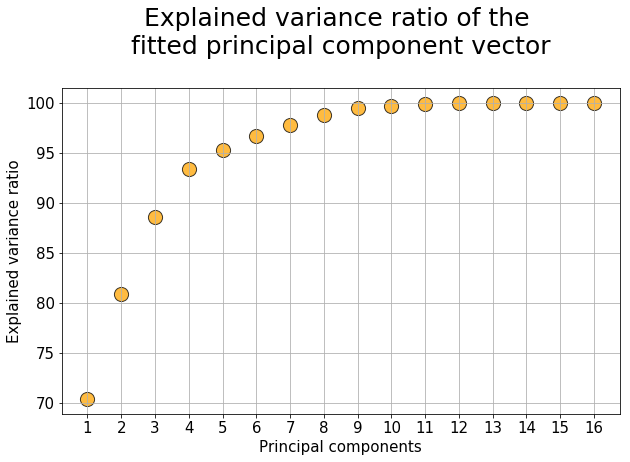

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(var1))],y=var1,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(var1))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 1st principal component explains about 70% of the total variance in the data, the 2nd component explains further 80% and 3rd component explains almost 90%.

#### Looking at above plot, we can confirm that we can take 3 variables as mentioned above.

In [61]:
print(pca.components_)

[[  2.66680761e-01   2.49630961e-01   2.58814463e-01   2.64846957e-01
    2.58815853e-01   2.78514626e-01   2.78807570e-01   2.69096387e-01
    2.74501569e-01   2.61648539e-01   2.69095967e-01   2.58389879e-01
   -2.56668739e-01   1.67337269e-01   7.04006974e-02   2.30018365e-01]
 [ -2.94844179e-01  -3.04666661e-01  -3.08566095e-01  -2.28675347e-01
   -3.08567056e-01   2.60693870e-01   2.49778241e-01   2.87033112e-01
    2.72473999e-01   2.62470131e-01   2.87034304e-01  -8.65097640e-03
   -5.30603460e-02  -3.59628846e-02  -2.97479980e-01  -2.15843319e-01]
 [  1.82339680e-01  -7.96501958e-02   2.18903790e-01   2.40635185e-01
    2.18897596e-01   1.26286346e-03   1.22880779e-03  -1.13779298e-02
    9.75621820e-03  -9.13225624e-02  -1.13771751e-02   2.76742666e-01
    2.67412818e-01  -4.21636065e-01  -6.20753172e-01  -2.94555905e-01]
 [  1.60915765e-02  -7.64324765e-02   5.23891721e-02   4.18812647e-02
    5.24018596e-02   8.77529080e-02   7.02074005e-02   1.25412096e-01
    9.84533159e-0

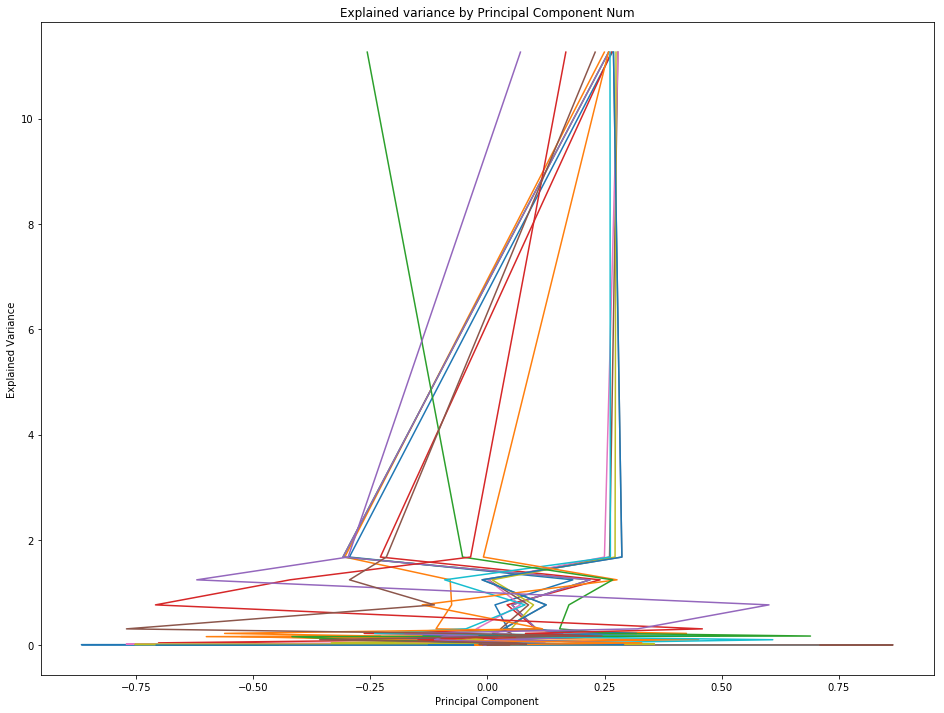

In [83]:
# Plot the explained variance for all 111 principal components
# Note: If the first value is too large, it may dwarf how the rest look.
#   You may consider plotting starting with the 2nd value (python index at 1)
fig = plt.figure(figsize=(16,12))
plt.plot(  pca.components_, pca.explained_variance_  )
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [112]:
# Perform linear regression with the first N columns
n = 3
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     26.26
Date:                Wed, 23 May 2018   Prob (F-statistic):           7.29e-17
Time:                        14:19:11   Log-Likelihood:                -8297.1
No. Observations:                5875   AIC:                         1.660e+04
Df Residuals:                    5871   BIC:                         1.663e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.013  -3.38e-13      1.0

Text(0.5,1,'Residual Histogram')

#### R-squared value is very less 0.013. Let's try with n =5.


In [63]:
# Perform linear regression with the first N columns
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     95.87
Date:                Sun, 20 May 2018   Prob (F-statistic):           2.21e-97
Time:                        23:17:34   Log-Likelihood:                -8105.6
No. Observations:                5875   AIC:                         1.622e+04
Df Residuals:                    5869   BIC:                         1.626e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.013  -3.49e-13      1.0

Text(0.5,1,'Residual Histogram')

#### n= 5 , gives us better value 0.076


In [73]:
# Perform linear regression with the first N columns
n = 2
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     37.41
Date:                Tue, 22 May 2018   Prob (F-statistic):           7.14e-17
Time:                        15:47:03   Log-Likelihood:                -8299.1
No. Observations:                5875   AIC:                         1.660e+04
Df Residuals:                    5872   BIC:                         1.662e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.013  -3.38e-13      1.0

Text(0.5,1,'Residual Histogram')

#### n =2 gives the same value as n= 3. R-square is 0.013.

From: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

-- run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing

In [88]:
my_model = PCA(n_components=0.99, svd_solver='full')
pca_result1 = my_model.fit_transform(x_scaled)
print(my_model.explained_variance_)

[ 11.2629682    1.67318476   1.24072101   0.76499734   0.30930303
   0.22292013   0.17279223   0.16177186   0.10309248]


In [90]:
var= my_model.explained_variance_ratio_
print(var)

[ 0.70381569  0.10455625  0.07753186  0.0478042   0.01932815  0.01393014
  0.01079768  0.01010902  0.00644218]


#### let's take 9 components

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     71.84
Date:                Wed, 23 May 2018   Prob (F-statistic):          2.42e-126
Time:                        12:05:47   Log-Likelihood:                -8029.1
No. Observations:                5875   AIC:                         1.608e+04
Df Residuals:                    5865   BIC:                         1.614e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.012  -3.53e-13      1.0

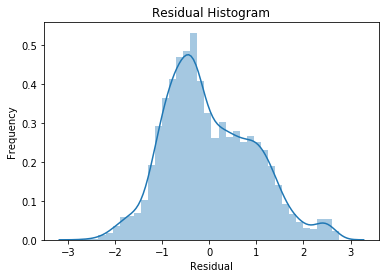

In [89]:
# Perform linear regression with the first N columns
n = 9
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

#### Summary of your results!

- n= 9 shows highest R-square value 0.099 which means that this model provides a better fit to the data than a model
- PC3.PC4,PC5 and PC6 are negatively associated with 'total_UPDRS' and PC1,PC2,PC7,PC8,PC9 are positively associated with 'total_UPDRS'.


In this Assignment, we have worked on the principal component analysis for dimensionality reduction.
This helps speeding up the fitting of a machine learning algorithm. 

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

In the above example, we have covered both points.